# EDSA Apple Prices Challenge

**Flex your Regression skills to predict the price of apples.**

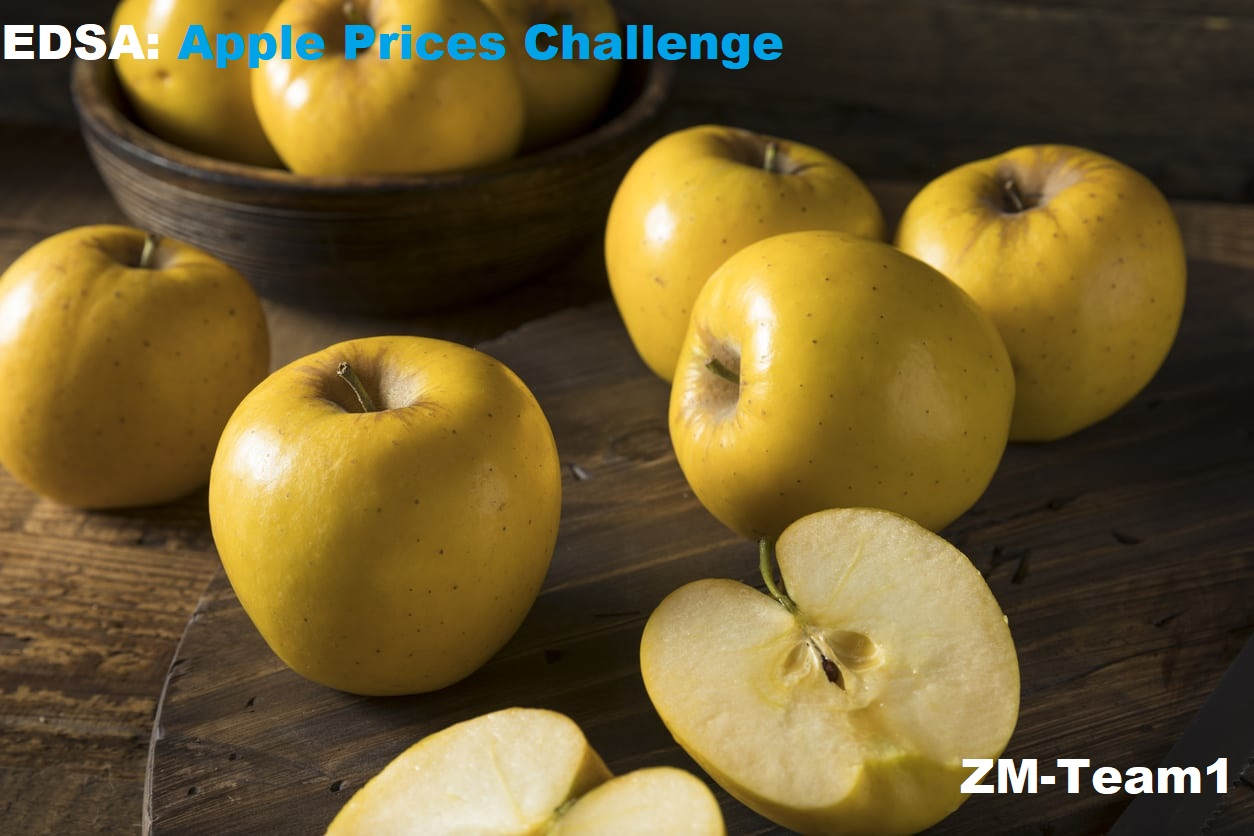

In [1]:
#Import library
from IPython.display import Image 

#Load image from local storage
Image(filename = "golden apples.JPG", width = 900, height = 900)

# Challenge Description

Imagine you are in the Fresh Produce Industry. How much stock do you have on hand? Not too little that you run out of stock when customers want to buy more. And not too much that food waste occurs. How do you set your prices? Yields from farms fluctuate by season. Should your prices then also fluctuate by season?

With this context, EDSA is challenging you to **construct a regression algorithm, capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost**, given certain parameters.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being able to accurately determine how much stock to have on hand and what price to set the Golden Delicious Apples to.

Some research was performed to determine which months Golden Apples were harvested in South Africa. More information may be found at this link: https://www.dennegeur.co.za/products/#:~:text=Golden%20Delicious%20was%20found%20as,to%20a%20golden%20yellow%20colour.

What did seem of interest was the following:

"Golden Delicious Golden Delicious was found as a seedling in West Virginia, USA, in the 1880’s and introduced into South Africa in 1930 by Molteno Brothers of Grabouw. Golden delicious is harvested from late February to mid March. It is a medium to large apple, green when harvested, ripening to a golden yellow colour."

As a bonus objective, an attempt to detemine whether or not this season had an impact on prices was also investigated.

**Introduction to Exploratory Data Analysis**

Exploratory Data Analysis (or EDA) is understanding the data sets by summarizing their main characteristics, often plotting them visually. 

This step is **very** important especially with regards to the 'Golden Delicious Apple' data in order to apply Machine learning predictions. 

The plotting done during the EDA consists of many visualizations such as Histograms, Boxplots and Scatter plots, to name a few.

**Importing the required libraries for EDA (Exploratory data analysis)**

In [2]:
#importing required libraries for EDA below
import pandas as pd #required for use of dataframes
import numpy as np #required for use of arrays
import seaborn as sns #required for use in visualization
import matplotlib.pyplot as plt #required for use in visualization
%matplotlib inline 
sns.set(color_codes=True) #required for importation of Seaborn styles

**Importing the dataset**

In [3]:
#importing train datasets
df_train= pd.read_csv('~/Desktop/Data Science/Predicts/Predict 4/EDSA_ZM-Team1/PREDICT Golden apples/train_set.csv')
#importing test datasets
df_test = pd.read_csv('~/Desktop/Data Science/Predicts/Predict 4/EDSA_ZM-Team1/PREDICT Golden apples/test_set.csv')

In [4]:
#displaying the top 5 rows of the train dataset for inspection
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48


In [5]:
#displaing the top 5 rows of the test dataset for inspection
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


**BASIC EXPLORE DATA ANALYSIS**

The shape of both the train and test dataset are explored.

In [6]:
#confirming the data shapes for both the train and test
df_train.shape , df_test.shape

((64376, 13), (685, 13))

The 'shape' attribute indicates that there are: 

- 64376 rows of data and 13 features for the train dataset. 
- 685 rows and 13 features for the test dataset.

Next, the datasets are both checked for null values.

In [7]:
#first for the train dataset...
print(df_train.isnull().sum())

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
dtype: int64


In [8]:
#...and then for the test dataset
print(df_test.isnull().sum())

Index             0
Province          0
Container         0
Size_Grade        0
Weight_Kg         0
Commodities       0
Date              0
Low_Price         0
High_Price        0
Sales_Total       0
Total_Qty_Sold    0
Total_Kg_Sold     0
Stock_On_Hand     0
dtype: int64


This confirms that there are no nulls in neither of the datasets.

The datasets are then explored in terms of their DataTypes.

In [9]:
#first train...
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64376 entries, 0 to 64375
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64376 non-null  object 
 1   Container         64376 non-null  object 
 2   Size_Grade        64376 non-null  object 
 3   Weight_Kg         64376 non-null  float64
 4   Commodities       64376 non-null  object 
 5   Date              64376 non-null  object 
 6   Low_Price         64376 non-null  float64
 7   High_Price        64376 non-null  float64
 8   Sales_Total       64376 non-null  float64
 9   Total_Qty_Sold    64376 non-null  int64  
 10  Total_Kg_Sold     64376 non-null  float64
 11  Stock_On_Hand     64376 non-null  int64  
 12  avg_price_per_kg  64376 non-null  float64
dtypes: float64(6), int64(2), object(5)
memory usage: 6.4+ MB


In [10]:
#...and then test
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           685 non-null    int64  
 1   Province        685 non-null    object 
 2   Container       685 non-null    object 
 3   Size_Grade      685 non-null    object 
 4   Weight_Kg       685 non-null    float64
 5   Commodities     685 non-null    object 
 6   Date            685 non-null    object 
 7   Low_Price       685 non-null    float64
 8   High_Price      685 non-null    float64
 9   Sales_Total     685 non-null    float64
 10  Total_Qty_Sold  685 non-null    int64  
 11  Total_Kg_Sold   685 non-null    float64
 12  Stock_On_Hand   685 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 69.7+ KB


Using the 'info' method we can see the Datatype (Dtypes) for each column. In this manner, the number of categorical and numerical features are confirmed. 

A column of the Datatype 'object' signifies a column consisting of categorical variables, where as numerical variables fall under the Datatypes of either 'int64' or 'float64'.

Descriptive statistics, with regard to each numeric column in our dataset are investigated.

In [11]:
df_train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,64376.000000,64376.000000,64376.000000,6.437600e+04,64376.000000,64376.000000,64376.000000,64376.00
mean,12.781592,75.651938,89.607858,1.939501e+04,446.104402,3336.641295,477.646328,NaN
std,35.943052,159.508144,172.223177,4.442192e+04,1184.169758,7682.295441,1453.892091,NaN
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-inf
25%,7.000000,30.000000,35.000000,1.154000e+03,20.000000,175.000000,0.000000,4.02
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.00
75%,11.000000,80.000000,100.000000,1.877200e+04,390.000000,3250.000000,381.000000,8.67
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,inf


In [12]:
df_test.describe()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,343.000000,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,197.886752,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,1.000000,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,172.000000,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,343.000000,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,514.000000,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,685.000000,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


A measure of potential outliers present in the dataset are explored next.

In [13]:
df_train.kurtosis()

Weight_Kg           116.022033
Low_Price           123.977754
High_Price          109.763276
Sales_Total          89.378966
Total_Qty_Sold      152.646835
Total_Kg_Sold        83.222862
Stock_On_Hand       437.075702
avg_price_per_kg           NaN
dtype: float64

In [14]:
df_test.kurtosis()

Index             -1.200000
Weight_Kg         13.611804
Low_Price         20.126362
High_Price        17.610473
Sales_Total       19.626133
Total_Qty_Sold    19.531658
Total_Kg_Sold     24.423404
Stock_On_Hand     14.868371
dtype: float64

The statistics indicate a presence of outliers for all numerical columns.

A look into the symmetry ('skewness') of the dataset is performed:

In [15]:
df_train.skew()

Weight_Kg           10.746241
Low_Price           10.071797
High_Price           9.519075
Sales_Total          7.372393
Total_Qty_Sold       9.448153
Total_Kg_Sold        7.171355
Stock_On_Hand       13.767932
avg_price_per_kg          NaN
dtype: float64

The skew values calculated on the train dataset are above 1 which indicates that the data has a High Postive Skew.

In [16]:
df_test.skew()

Index             0.000000
Weight_Kg         3.941111
Low_Price         4.585123
High_Price        4.326922
Sales_Total       3.839600
Total_Qty_Sold    3.710551
Total_Kg_Sold     4.270965
Stock_On_Hand     3.197405
dtype: float64

The skew values calculated of the train dataset are above 1. This indicates that the data has a High Postive Skew except for 'Index' which has a skew value of 0, indicating that it has a Moderate Positive Skew.

Duplicate rows are checked for and dropped (if necessary):

In [17]:
#rows containing duplicate data on train data
duplicate_rows_df = df_train[df_train.duplicated()]
print('duplicate rows: ', duplicate_rows_df.shape)

duplicate rows:  (0, 13)


In [18]:
#rows containing duplicate data on test data
duplicate_rows_df = df_test[df_test.duplicated()]
print('duplicate rows: ', duplicate_rows_df.shape)

duplicate rows:  (0, 13)


This type of data exploration is handy since working with huge dataset often can contain duplicates.

In this case there are no duplicates, hence there is no need to drop any of the rows.

**DATA VISUALIZATION**

- Histograms And Density Plots

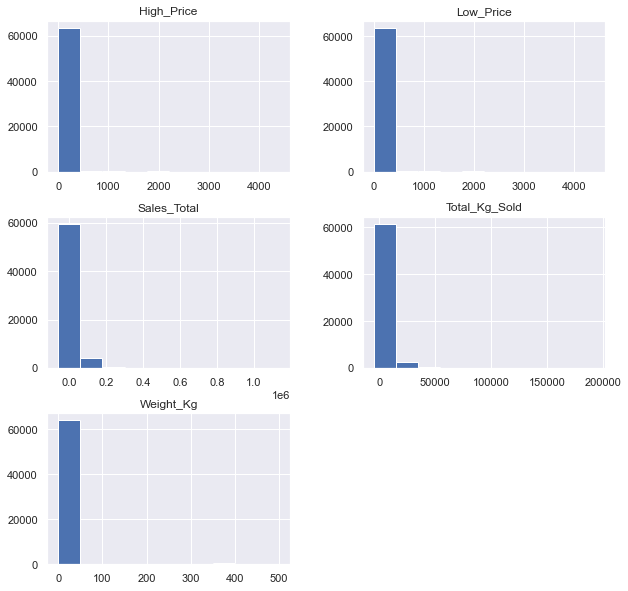

In [19]:
#a variable called 'features' is created, consisting of the numerical columns
features = ['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Kg_Sold']

#plotting histograms
df_train[features].hist(figsize=(10,10));

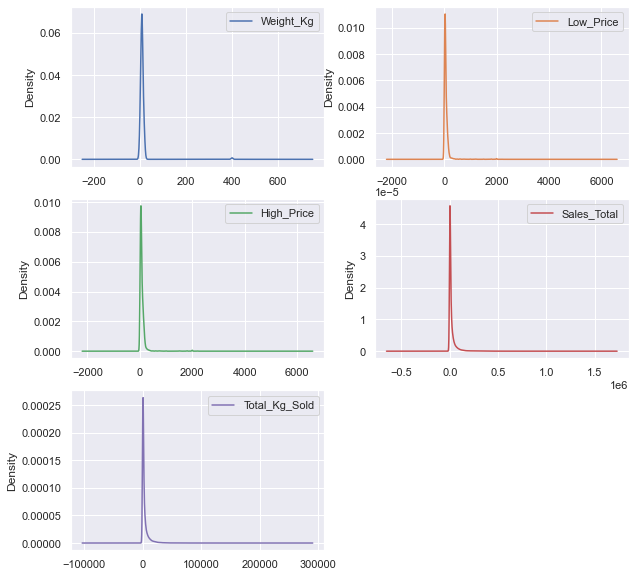

In [20]:
#plotting density plots
df_train[features].plot(kind='density',subplots=True, layout=(3,2), sharex=False, figsize=(10,10));

- Correlation Coefficient Values:

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.832214,0.846184,0.007710,-0.055573,0.032639,-0.039879,-0.054991
Low_Price,0.832214,1.000000,0.962504,-0.006438,-0.093333,-0.031281,-0.062260,0.124585
High_Price,0.846184,0.962504,1.000000,0.029433,-0.082580,-0.000889,-0.046742,0.123440
Sales_Total,0.007710,-0.006438,0.029433,1.000000,0.750116,0.920337,0.265030,-0.000303
Total_Qty_Sold,-0.055573,-0.093333,-0.082580,0.750116,1.000000,0.735714,0.347718,-0.037589
Total_Kg_Sold,0.032639,-0.031281,-0.000889,0.920337,0.735714,1.000000,0.236541,-0.077350
Stock_On_Hand,-0.039879,-0.062260,-0.046742,0.265030,0.347718,0.236541,1.000000,-0.025811
avg_price_per_kg,-0.054991,0.124585,0.123440,-0.000303,-0.037589,-0.077350,-0.025811,1.000000


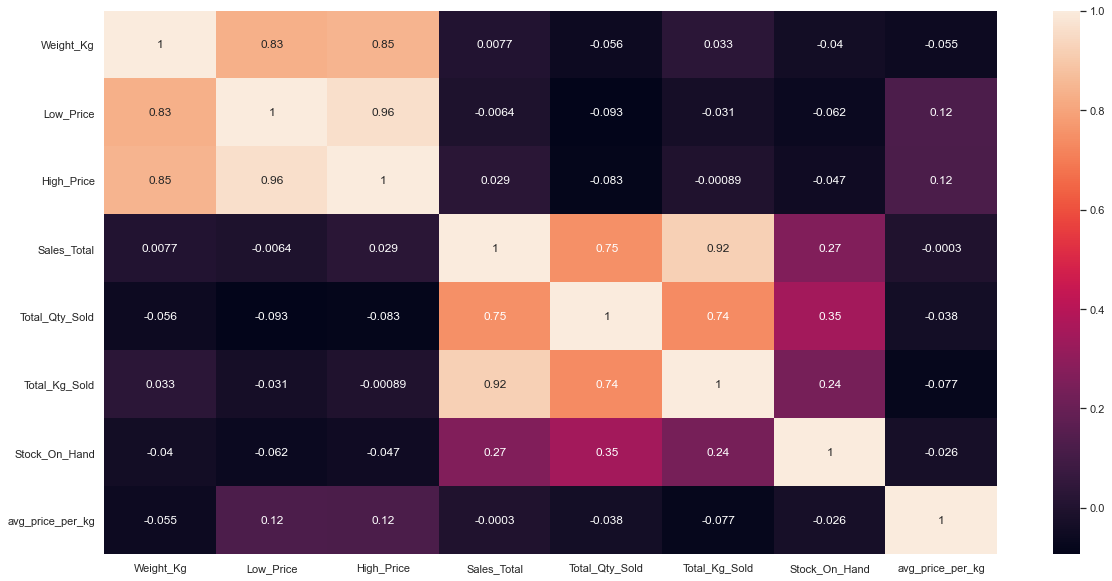

In [21]:
#creating a correlation table and heatmap
plt.figure(figsize=(20,10))
correlation= df_train.corr()
sns.heatmap(correlation,annot=True)
correlation

Some observations to take note of:

- Weight_kg and Low_Price =0.83 (Strong Positive Correlation) 
- Weight_kg and High_Price=0.96(Strong Positive Correlation) 
- Weight_kg and avg_price_per_kg=-0.055(Weak Negative Correlation) 
- High_price and Sales_Total=0.029(Weak Positive Correlation) 
- Low_Price and Sales_Total=-0.0064(Weak Negative Correlation) 
- Total_kg_Sold and Sales_Total=0.92 (Strong Positive Correlation)

- Scatter Plot:

Text(0.5, 1.0, 'Sales Total vs Total kg sold')

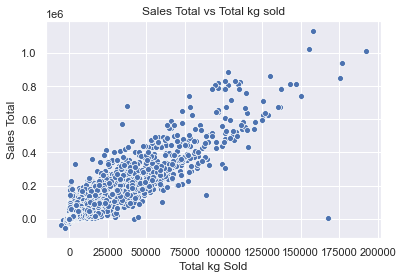

In [22]:
#plotting scatter plot
sns.scatterplot(x='Total_Kg_Sold',y='Sales_Total',data=df_train)
plt.xlabel('Total kg Sold')
plt.ylabel('Sales Total')
plt.title('Sales Total vs Total kg sold')

The scatter plot shows that there is a Strong Postive relationship between Sales_Total and Total_Kg_Sold.

- Box Plot:

C:\Users\tamak\Anaconda3\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


Text(0.5, 0, 'avg_price_per_kg')

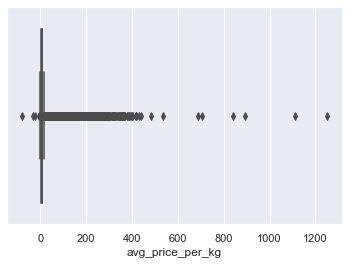

In [23]:
#creating a boxplot
sns.boxplot(x=df_train['avg_price_per_kg'])
plt.xlabel('avg_price_per_kg')

- Bar Plot:

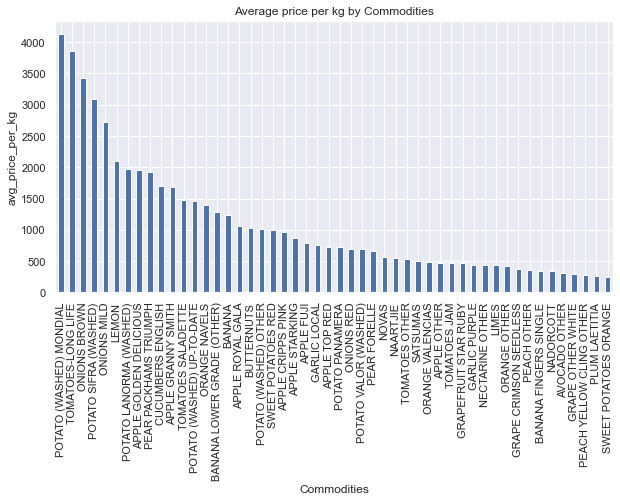

In [24]:
#creating a bar plot
df_train.Commodities.value_counts().nlargest(50).plot(kind='bar', figsize=(10,5))
plt.title('Average price per kg by Commodities')
plt.ylabel('avg_price_per_kg')
plt.xlabel('Commodities');

There are a variety of commodities present in the dataset. Using a Bar Graph helps to locate which commodities are doing well in terms of sales and which are not. 

There is a huge difference between the commodities that are doing well in terms of sales and those that are not. 

The APPLE GOLDEN DELICIOUS commodity is in the 7th highest postion which indicates that the average price per kg of Golden Apples is quite high.

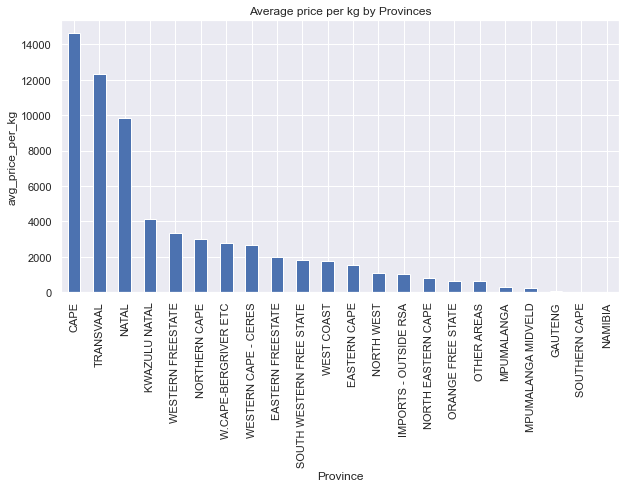

In [25]:
df_train.Province.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Average price per kg by Provinces')
plt.ylabel('avg_price_per_kg')
plt.xlabel('Province');

Notice that the Province with the highest avg_per_kg is 'CAPE'. The provinces with a lower rate of avg_price_per_kg are 'GAUTENG', 'SOUTHERN CAPE' and 'NAMIBIA'.

**Remarks and Findings**

During the EDA process of the dataset, the total volume of the dataset was fully realised. 

The data visualizations became clustered with other type of commodities which do not contribute to our solution of *predicting the average price of the Golden delicious apples per kilogram.* 

There is a lot of data in the dataset which is irrelevant to the problem in question. These rows would affect the performance of our model and also the prediction accuracy of the model.

Thus, the data is subset to contain only data of where the **Golden Delicious Apple** is foudn in the 'Commodity' column.

**NB!!!** The following sections contain only the subset of the data which belong to the commodity of Golden Delicious Apple.

**WORKING WITH SUBSET (APPLE GOLDEN DELICIOUS) FROM THE ENTIRE DATA**

- Subsetting the Data:

In [26]:
#subsetting train dataset to contain only the applicable rows
train=df_train[df_train['Commodities']=='APPLE GOLDEN DELICIOUS']
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [27]:
#subsetting test dataset to contain only the applicable rows
test=df_test[df_test['Commodities']=='APPLE GOLDEN DELICIOUS']
test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


After going through the EDA with the entire dataset it was noted that there were some Provinces with incorrect, or inconsitent, names and was rectified.

Replacing of inconsistent rows:

- 'NATAL'  to  'KWA-ZULU NATAL'  
- 'CAPE' to 'SOUTHERN CAPE'.

In [28]:
train['Province'].replace('NATAL','KWA-ZULU NATAL',inplace=True)
train.head()

C:\Users\tamak\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [29]:
train['Province'].replace('CAPE','SOUTHERN CAPE',inplace=True)
train.head()

C:\Users\tamak\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,SOUTHERN CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,SOUTHERN CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,SOUTHERN CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


After expolring the data it was also noted that the DataType for the 'Date' column had to be changed to Datetime.

In [30]:
train['Date'] = pd.to_datetime(train['Date'])

C:\Users\tamak\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
test['Date'] = pd.to_datetime(test['Date'])

**BASIC EXPLORE DATA ANALYSIS**

- Exploring the of the shape of the newly subsetted train and test datasets:

In [32]:
#confirming the data shapes for both the train and test datasets
train.shape , test.shape

((1952, 13), (685, 13))

The 'shape' attribute now indicates:

- 1952 rows of data and 13 features for the train dataset.
- 685 rows and 13 features for the test dataset.


Checking for nulls in the subsetted datasets is not required as there were no nulls in either of the full datasets to begin with.

Checking the DataTypes of the dataset is also unnecessary as their types would not have changed by subsetting.

- Descriptive statistics of each numeric feature in the newly subsetted datasets:

In [33]:
test.describe()

,Index,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
count,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000,685.000000
mean,343.000000,34.142482,164.202891,195.590073,18788.111212,174.883212,2725.402336,439.245255
std,197.886752,87.575995,355.167319,389.109476,33951.586813,299.351142,5059.123311,715.985761
min,1.000000,3.000000,10.000000,10.000000,10.000000,1.000000,6.300000,0.000000
25%,172.000000,9.000000,50.000000,64.000000,1300.000000,13.000000,204.000000,20.000000
50%,343.000000,12.000000,80.000000,112.000000,5520.000000,62.000000,860.100000,153.000000
75%,514.000000,18.300000,128.000000,160.000000,21176.000000,200.000000,3033.000000,516.000000
max,685.000000,400.000000,2400.000000,2400.000000,308010.000000,2774.000000,47200.000000,6827.000000


In [34]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


**MEASURE OF OUTLIERS PRESENT IN THE DATA**

- Exploring of the symmetry of the subsetted datasets:

In [35]:
train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

The skew values calculated are above 1 which indicates that the data has a High Postive Skew except for 'avg_price_per_kg' which has a skew value of 0.08 which indicates a Moderate Positive Skew.

In [36]:
test.skew()

Index             0.000000
Weight_Kg         3.941111
Low_Price         4.585123
High_Price        4.326922
Sales_Total       3.839600
Total_Qty_Sold    3.710551
Total_Kg_Sold     4.270965
Stock_On_Hand     3.197405
dtype: float64

The skew values calculated are above 1 which indicates that the data has a High Postive Skew except for 'Index' which has a skew value of 0, indicating that it has a Moderate Positive Skew.

Checking the for duplicate columns in the datasets is also unnecessary as they would have been detected in the full dataset inspections.

This confrims that there are no duplicate rows present so there was no requirement for any dropping of rows.

**DATA VISUALIZATION**

- Histograms and Density Plots:

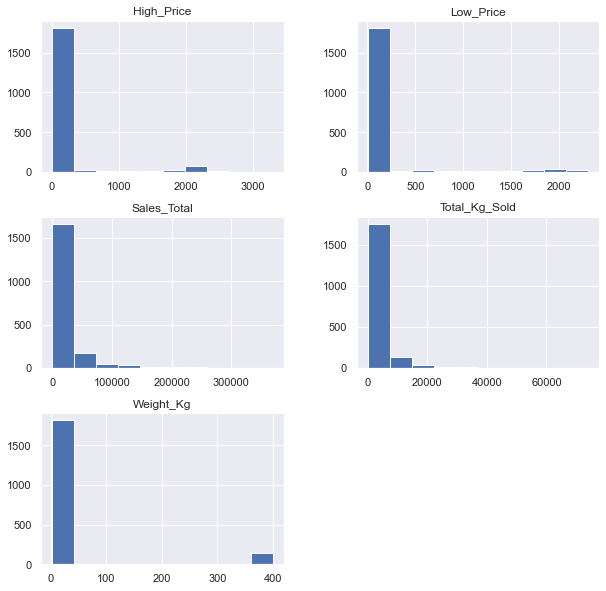

In [37]:
#defining numerical columns as 'features'
features = ['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Kg_Sold']  

#plotting histograms
train[features].hist(figsize=(10,10));

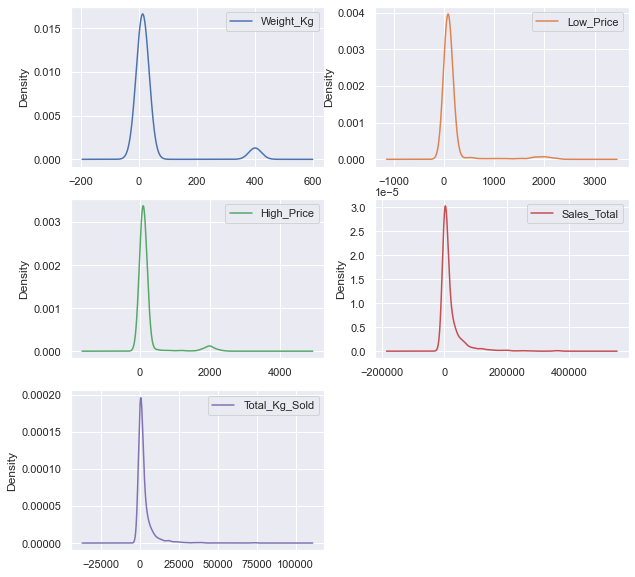

In [38]:
#density plots
train[features].plot(kind='density',subplots=True, layout=(3,2), sharex=False, figsize=(10,10));

The Histograms and Density Plots show the smoothed distribution of the points along the numeric axis. 

The peaks of the density plot are at the locations where there is the highest concentration of points. 

In the data, one may observe that the numerical features ('Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Kg_Sold') chosen to create the model have their highest concentration points at 0.

- Correlation Coefficient Values:

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


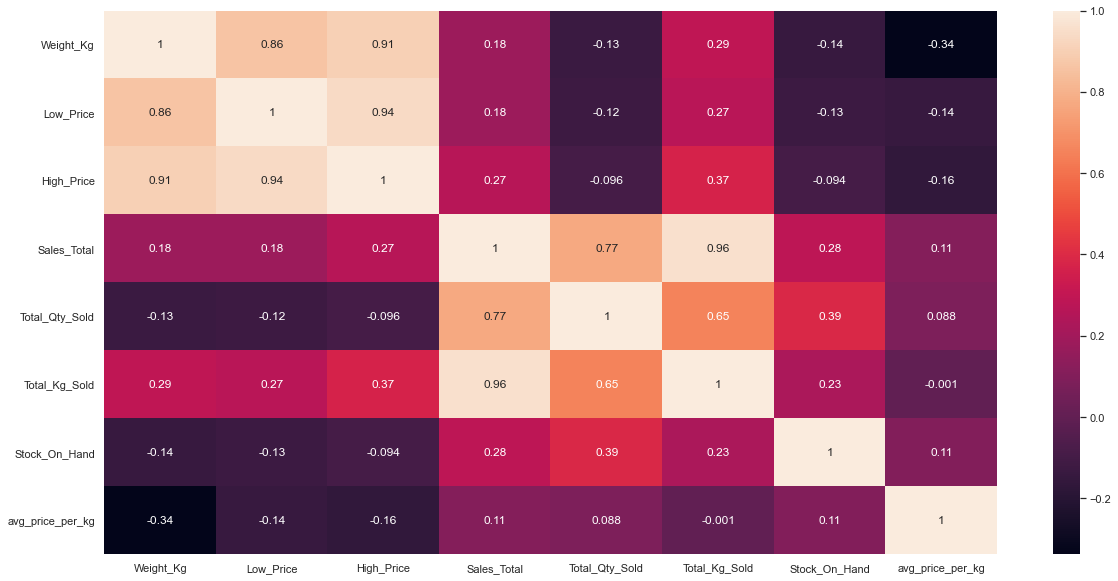

In [39]:
#plotting correlation table and heat map
plt.figure(figsize=(20,10))
correlation= train.corr()
sns.heatmap(correlation,annot=True)
correlation

Observations of note:

- Weight_kg and Low_Price =0.86 (Strong Positive Correlation)
- Weight_kg and High_Price=0.91(Strong Positive Correlation)
- Weight_kg and avg_price_per_kg=-0.34(Weak Negative Correlation)
- High_price and Sales_Total=0.27(Weak Positive Correlation)
- Low_Price and Sales_Total=0.18(Weak Positive Correlation)
- Total_kg_Sold and Sales_Total=0.77 (Moderate Positive Correlation)
- It can also be observed that average price/kg has very low correlation with other features

- Scatter Plots:

Text(0.5, 1.0, 'Sales Total vs Average Price/Kg')

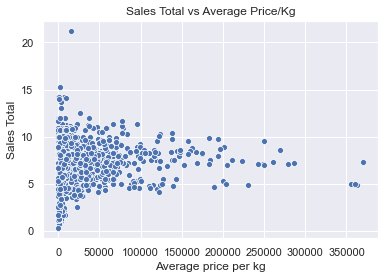

In [40]:
sns.scatterplot(x='Sales_Total',y='avg_price_per_kg',data=train);
plt.xlabel('Average price per kg')
plt.ylabel('Sales Total')
plt.title('Sales Total vs Average Price/Kg')

The Scatter plot above indicates that there is a non-linear relationship between 'Sales_Total' and 'avg_price_per_kg'.

Text(0.5, 1.0, 'Sales Total vs Total kg sold')

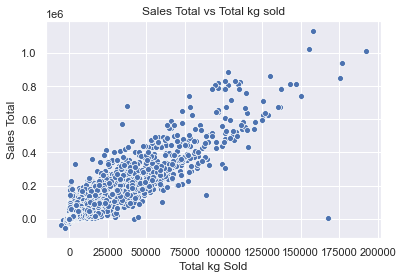

In [41]:
sns.scatterplot(x='Total_Kg_Sold',y='Sales_Total',data=df_train)
plt.xlabel('Total kg Sold')
plt.ylabel('Sales Total')
plt.title('Sales Total vs Total kg sold')

The Scatter plot above indicates that there is a somewhat non-linear relationship between 'Sales_Total' and 'Total kg sold'.

- Joint Plots:

Text(336.9714285714286, 0.5, 'Total Quality Sold')

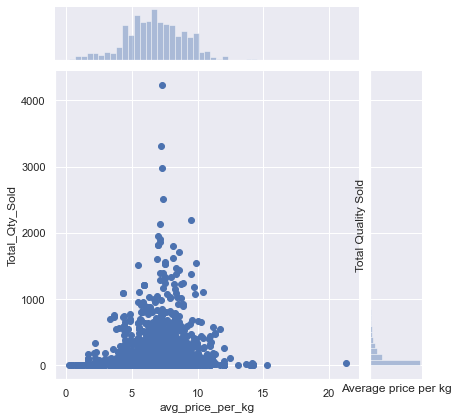

In [42]:
sns.jointplot(y = 'Total_Qty_Sold', x = 'avg_price_per_kg', data = train);
plt.xlabel('Average price per kg')
plt.ylabel('Total Quality Sold')

The joint plot between 'Total_Quantity_Sold' and 'avg_price_per_kg' shows that the bulk Golden Delicious Apples being sold fall between R5/kg and R10/kg.

- Box Plot and Violin Plot:

Text(0.5, 0, 'Average price per kg')

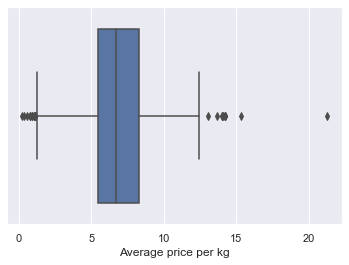

In [43]:
sns.boxplot(x=train['avg_price_per_kg'])
plt.xlabel('Average price per kg')

Text(0.5, 0, 'Sales Total')

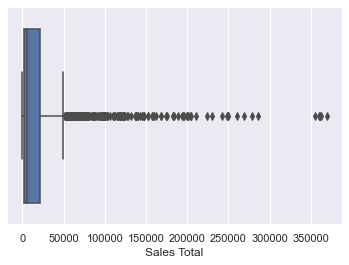

In [44]:
sns.boxplot(x=train['Sales_Total'])
plt.xlabel('Sales Total')

Text(0.5, 0, 'Average price per kg')

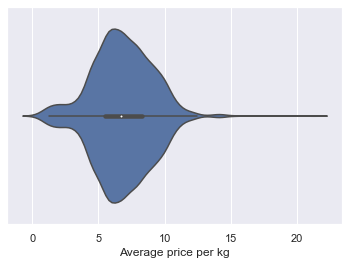

In [45]:
sns.violinplot(x='avg_price_per_kg', data=train)
plt.xlabel("Average price per kg")

Text(0.5, 0, 'Sales Total')

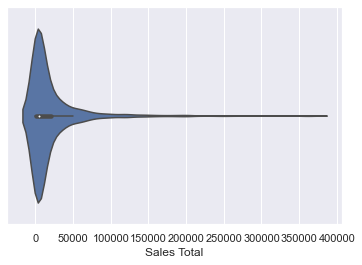

In [46]:
sns.violinplot(x='Sales_Total', data=train);
plt.xlabel('Sales Total')

- Bar Plot:

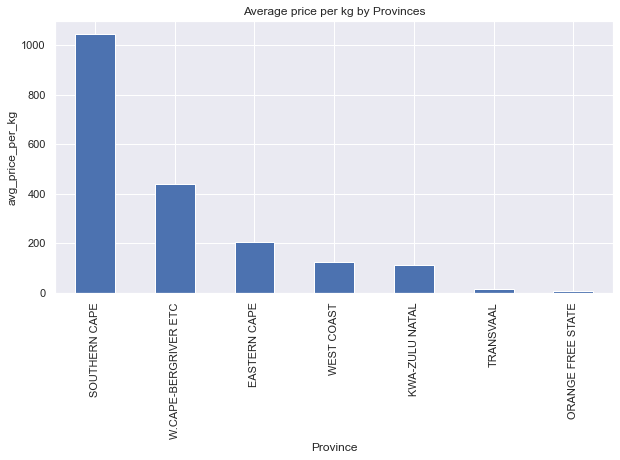

In [47]:
train.Province.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5),)
plt.title('Average price per kg by Provinces')
plt.ylabel('avg_price_per_kg')
plt.xlabel('Province');

The Bar Graph indicates that the Southern Cape has the highest 'avg_price_per_kg' for 'APPLE GOLDEN DELICIOUS' and the Orange Free State has the lowest 'avg_price_per_kg' for 'APPLE GOLDEN DELICIOUS'.

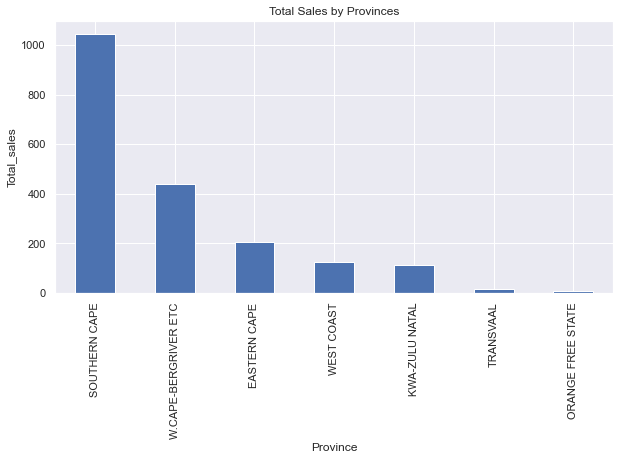

In [48]:
train.Province.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Total Sales by Provinces')
plt.ylabel('Total_sales')
plt.xlabel('Province');

The Bar Graph above indicates that the Southern Cape has the highest(over 1000) for 'Total_Sales' of 'APPLE GOLDEN DELICIOUS' and the Orange Free State has the lowest Total Sales(below 100) for 'APPLE GOLDEN DELICIOUS'.

All categorial variable features are converted to dummy variables:

In [49]:
#creating a copy of train to work on so as to not overwrite origional train set data in case an error is made
model_train = train.loc[train['Commodities'] == 'APPLE GOLDEN DELICIOUS'].copy()

model_train =  pd.get_dummies(model_train, drop_first = True, columns=['Province'])
model_train =  pd.get_dummies(model_train, drop_first = True, columns=['Container'])
model_train =  pd.get_dummies(model_train, drop_first = True, columns=['Size_Grade'])

#'Commodity' column is dropped since this only has one value and is thus irrelevant 
model_train = model_train.drop('Commodities',axis=1)

#'Date' column is dropped for now
model_train = model_train.drop('Date',axis=1)

#the same is applied to a copy of the test dataset for consistency
model_test = test.loc[test['Commodities'] == 'APPLE GOLDEN DELICIOUS'].copy()

model_test =  pd.get_dummies(model_test, drop_first = True, columns=['Province'])
model_test =  pd.get_dummies(model_test, drop_first = True, columns=['Container'])
model_test =  pd.get_dummies(model_test, drop_first = True, columns=['Size_Grade'])
model_test = model_test.drop('Commodities',axis=1)
model_test = model_test.drop('Date',axis=1)
model_test = model_test.drop('Index',axis=1)

**IMPORTING REQUIRED LIBRARIES FOR MODEL BUILDING FROM SCI-KIT LEARN** 

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from statsmodels.graphics.correlation import plot_corr
from sklearn import metrics
import math

Some basic models are then constructed for preliminary inspection and experimentaion.

**Defining Labels and Features to be used to create a train-test split:**

In [51]:
#defining label
y = model_train.avg_price_per_kg 

#defining features
x = model_train.drop('avg_price_per_kg',axis=1) 

#creating train-test-split
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.2, random_state=1) 

**LINEAR REGRESSION MODEL:**

The biggest advantage of a linear regression models is linearity: It makes the estimation procedure simple and, most importantly, these linear equations have an easy to understand interpretation on a modular level.

In [52]:
#creating basic Linear Regression model with default parameters
model_lr = LinearRegression() 

#fitting the model to the training dataset
model_lr.fit(x_train, y_train) 

LinearRegression()

**LASSO MODEL:**

In statistics and machine learning, Lasso (least absolute shrinkage and selection operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

In [53]:
#creating basic Lasso model with default parameters
model_las = Lasso(alpha=1.0)

#fitting model to the training dataset
model_las.fit(x, y)

Lasso()

**RIDGE MODEL:**

Ridge models include all (or none) of the features in the model. Thus, the major advantage of ridge regression is coefficient shrinkage and reducing model complexity

In [54]:
#creating basic Ridge model with default parameters
model_ridge = Ridge(alpha=1.0) 

#fitting model to the training dataset
model_ridge.fit(x, y)

Ridge()

**Inspecting coefficients of the features of the Linear Regression model:**

In [55]:
#extract model intercept
beta_0 = float(model_lr.intercept_)
#extract model coeffs
beta_js = pd.DataFrame(model_lr.coef_, x.columns, columns=['Coefficient'])
print("Intercept:", beta_0)

Intercept: -1277452.7283387773


In [56]:
beta_js

,Coefficient
Weight_Kg,4.258195e+05
Low_Price,5.614105e-04
High_Price,1.479614e-03
Sales_Total,6.839341e-05
Total_Qty_Sold,-2.209684e-03
Total_Kg_Sold,-3.523818e-04
Stock_On_Hand,-1.200927e-04
Province_KWA-ZULU NATAL,-3.551362e-01
Province_ORANGE FREE STATE,-5.448037e-01
Province_SOUTHERN CAPE,1.486668e+00


**2-Dimensional Plots:**

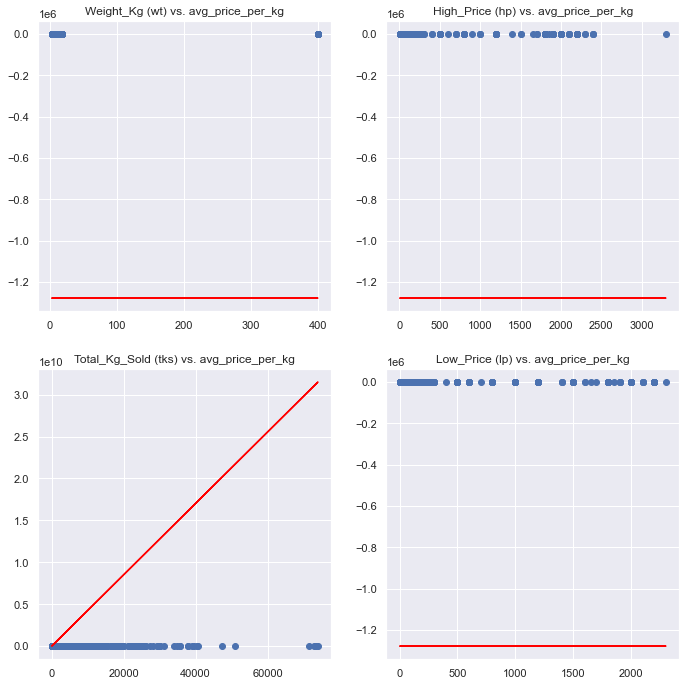

In [57]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0,0].scatter(model_train['Weight_Kg'], model_train['avg_price_per_kg'])
axs[0,0].plot(model_train['Weight_Kg'], model_lr.intercept_ + model_lr.coef_[4]*model_train['Weight_Kg'], color='red')
axs[0,0].title.set_text('Weight_Kg (wt) vs. avg_price_per_kg')

axs[0,1].scatter(model_train['High_Price'], model_train['avg_price_per_kg'])
axs[0,1].plot(model_train['High_Price'], model_lr.intercept_ + model_lr.coef_[1]*model_train['High_Price'], color='red')
axs[0,1].title.set_text('High_Price (hp) vs. avg_price_per_kg')

axs[1,0].scatter(model_train['Total_Kg_Sold'], model_train['avg_price_per_kg'])
axs[1,0].plot(model_train['Total_Kg_Sold'], model_lr.intercept_ + model_lr.coef_[0]*model_train['Total_Kg_Sold'], color='red')
axs[1,0].title.set_text('Total_Kg_Sold (tks) vs. avg_price_per_kg')

axs[1,1].scatter(model_train['Low_Price'], model_train['avg_price_per_kg'])
axs[1,1].plot(model_train['Low_Price'], model_lr.intercept_ + model_lr.coef_[2]*model_train['Low_Price'], color='red')
axs[1,1].title.set_text('Low_Price (lp) vs. avg_price_per_kg')

fig.tight_layout(pad=2.0)

plt.show()

**Checking for linearity:**

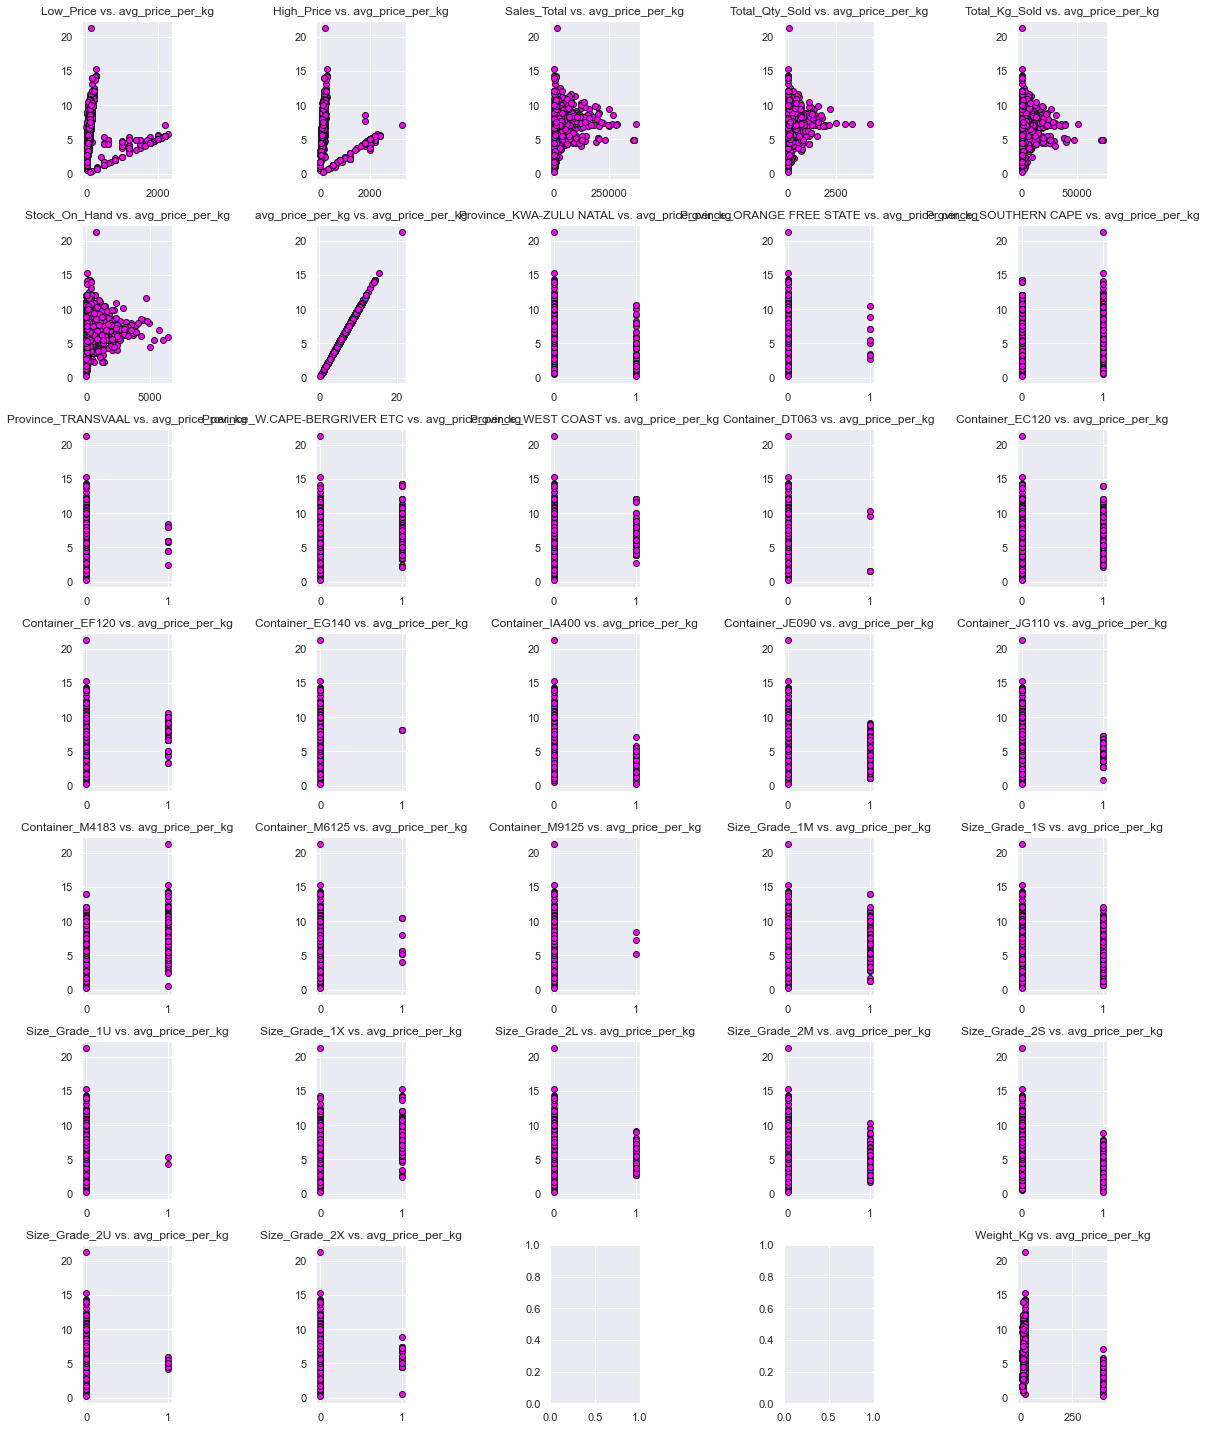

In [58]:
#creating scatter splots to compare relationships between label and features
fig, axs = plt.subplots(7,5, figsize=(16,20),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(model_train.columns):
    axs[index-1].set_title("{} vs. avg_price_per_kg".format(column),fontsize=12)
    axs[index-1].scatter(x=model_train[column],y=model_train['avg_price_per_kg'],color='magenta',edgecolor='k')

fig.tight_layout(pad=1)

In [59]:
#creating a copy purely for visualization purposes as not to affect the origional dataset
model_train1 = model_train.copy()

 **CORRELATION HEATMAP:**

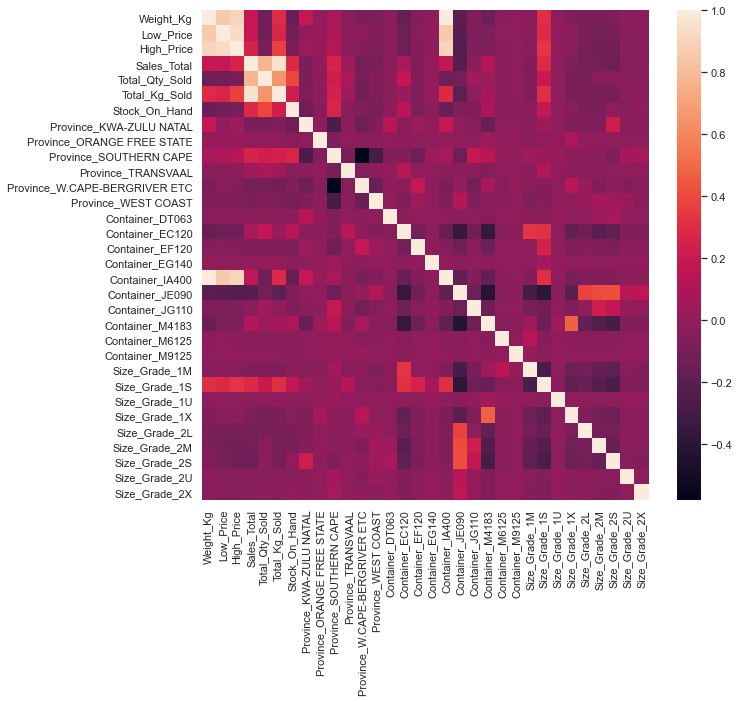

In [60]:
#only the predictor variables are compared, the target `avg_price_per_kg` column is dropped to determine interdependancy between predictor variables

#creating a correlation heat map
corr = model_train1.drop('avg_price_per_kg', axis='columns').corr()
plt.subplots(figsize=(10,9))
sns.heatmap(corr)

'avg_price_per_kg' is regressed on all of the predictors.

In [61]:
formula_str = model_train1.columns[0]+' ~ '+'+'.join(model_train1.columns[1:]); formula_str

'Weight_Kg ~ Low_Price+High_Price+Sales_Total+Total_Qty_Sold+Total_Kg_Sold+Stock_On_Hand+avg_price_per_kg+Province_KWA-ZULU NATAL+Province_ORANGE FREE STATE+Province_SOUTHERN CAPE+Province_TRANSVAAL+Province_W.CAPE-BERGRIVER ETC+Province_WEST COAST+Container_DT063+Container_EC120+Container_EF120+Container_EG140+Container_IA400+Container_JE090+Container_JG110+Container_M4183+Container_M6125+Container_M9125+Size_Grade_1M+Size_Grade_1S+Size_Grade_1U+Size_Grade_1X+Size_Grade_2L+Size_Grade_2M+Size_Grade_2S+Size_Grade_2U+Size_Grade_2X'

**RIDGE REGRESSION MODEL:**

In [62]:
#extracting the intercept value of the model
b0 = float(model_ridge.intercept_)

#extracting the model's coefficient values
coeff = pd.DataFrame(model_ridge.coef_, x.columns, columns=['Coefficient'])
print("Intercept:", float(b0))

Intercept: 5.634113406305225


In [63]:
#determing coefficient values amoung feature types
coeff

,Coefficient
Weight_Kg,-0.011697
Low_Price,0.000395
High_Price,0.001680
Sales_Total,0.000069
Total_Qty_Sold,-0.002148
Total_Kg_Sold,-0.000357
Stock_On_Hand,-0.000103
Province_KWA-ZULU NATAL,-0.610208
Province_ORANGE FREE STATE,-0.221453
Province_SOUTHERN CAPE,1.417677


Respective variables are not in the same scale. Variables with smaller coefficients are less important as they have suffered more in the shrinkage tradeoff.

In [64]:
#creating a scaler to fix the issue described above
scaler = StandardScaler()

#fitting the model to the scaler
model_scaled = scaler.fit_transform(x)

# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(model_scaled,columns=x.columns)
X_standardise.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_KWA-ZULU NATAL,Province_ORANGE FREE STATE,Province_SOUTHERN CAPE,...,Container_M9125,Size_Grade_1M,Size_Grade_1S,Size_Grade_1U,Size_Grade_1X,Size_Grade_2L,Size_Grade_2M,Size_Grade_2S,Size_Grade_2U,Size_Grade_2X
0,-0.222433,-0.065087,-0.105317,0.811807,0.510117,0.511073,0.571070,-0.245547,-0.068059,0.931634,...,-0.039233,-0.44198,-0.612085,-0.032026,-0.30986,-0.255934,-0.367265,-0.432837,-0.093731,-0.116187
1,-0.295704,-0.332855,-0.382175,-0.103950,0.471248,0.091837,-0.563874,-0.245547,-0.068059,0.931634,...,-0.039233,-0.44198,-0.612085,-0.032026,-0.30986,-0.255934,2.722828,-0.432837,-0.093731,-0.116187
2,-0.315779,-0.319467,-0.370639,-0.488870,-0.506948,-0.459029,1.515476,-0.245547,-0.068059,-1.073382,...,-0.039233,-0.44198,-0.612085,-0.032026,-0.30986,-0.255934,-0.367265,2.310338,-0.093731,-0.116187
3,-0.222433,-0.252525,-0.220674,0.306871,0.691504,0.679187,0.047781,-0.245547,-0.068059,0.931634,...,-0.039233,-0.44198,1.633760,-0.032026,-0.30986,-0.255934,-0.367265,-0.432837,-0.093731,-0.116187
4,3.608756,4.353082,3.655338,-0.468098,-0.562012,-0.419986,-0.561112,-0.245547,-0.068059,-1.073382,...,-0.039233,-0.44198,1.633760,-0.032026,-0.30986,-0.255934,-0.367265,-0.432837,-0.093731,-0.116187


In [65]:
#describing standardised dataset with respect to standard deviations
X_standardise.describe().loc['std']

Weight_Kg                        1.000256
Low_Price                        1.000256
High_Price                       1.000256
Sales_Total                      1.000256
Total_Qty_Sold                   1.000256
Total_Kg_Sold                    1.000256
Stock_On_Hand                    1.000256
Province_KWA-ZULU NATAL          1.000256
Province_ORANGE FREE STATE       1.000256
Province_SOUTHERN CAPE           1.000256
Province_TRANSVAAL               1.000256
Province_W.CAPE-BERGRIVER ETC    1.000256
Province_WEST COAST              1.000256
Container_DT063                  1.000256
Container_EC120                  1.000256
Container_EF120                  1.000256
Container_EG140                  1.000256
Container_IA400                  1.000256
Container_JE090                  1.000256
Container_JG110                  1.000256
Container_M4183                  1.000256
Container_M6125                  1.000256
Container_M9125                  1.000256
Size_Grade_1M                    1

The variance within each variable in the data is now equal to 1.000256.

In [66]:
#plotting the train and test response variables as a continuous line
train_plot = y_train.append(pd.Series(y_test[1], index=['2016M01']))

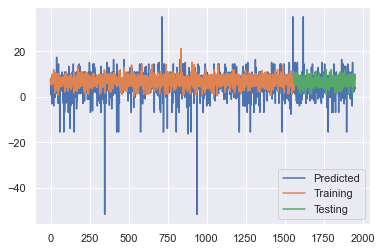

In [67]:
plt.plot(np.arange(len(y)), model_ridge.predict(X_standardise), label='Predicted')
plt.plot(np.arange(len(train_plot)), train_plot, label='Training')
plt.plot(np.arange(len(y_test))+len(y_train), y_test, label='Testing')
plt.legend()

plt.show()

**Scatter Plots for LINEAR,RIDGE and LASSO Regression Models:**

Text(0.5, 1.0, 'Linear Regression Model')

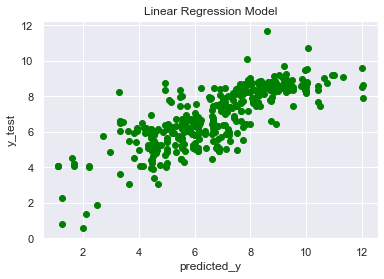

In [68]:
#creating scatter plot of Linear Regression model
prediction_lr = model_lr.predict(x_test)
plt.scatter(y_test,prediction_lr,color='green')
plt.ylabel('y_test')
plt.xlabel('predicted_y')
plt.title('Linear Regression Model')

From the scatter plot, it appears as though there is possibly a linear relationship between the y_test and the predicted Linear regression model.

Text(0.5, 1.0, 'Ridge Regression Model')

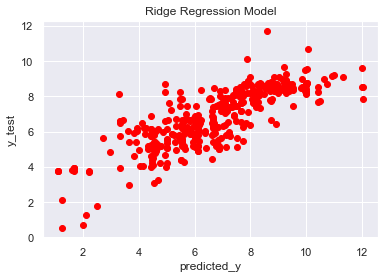

In [69]:
#creating Ridge scatter plot
prediction_ridge = model_ridge.predict(x_test)
plt.scatter(y_test,prediction_ridge, color='red')
plt.ylabel('y_test')
plt.xlabel('predicted_y')
plt.title('Ridge Regression Model')

There is a possible linear relationship between the y_test and the predicted Ridge Regression Model.

Text(0.5, 1.0, 'Lasso Regression Model')

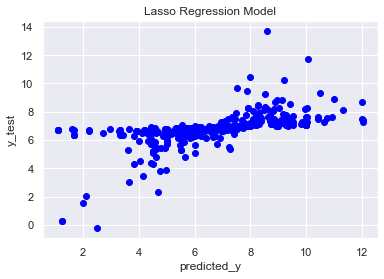

In [70]:
#creating Lasso scatter plot
prediction_las = model_las.predict(x_test)
plt.scatter(y_test,prediction_las,color='blue')
plt.ylabel('y_test')
plt.xlabel('predicted_y')
plt.title('Lasso Regression Model')

The linear relationship between y_test and predicted y value shows some correlation, even though the figure shows signs of outliers which might increase the overall error value.

**MODEL BUILDING**

**Importing Required Libraries for Model Building:**

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

First a copy of the training set is created (as to not overwrite the origional dataset in case of errors).
The following columns, which seemed to have little correlation with avg_price_per_kg, were dropped origionaly:

- Commodities (after we subset the data to select only rows relevant to Golden Apples, this row becomes redundant)
- Province (the dummy variables columns created from this column were numerous and did not seem to greatly impact model performance)
- Size_Grade (the dummy variables columns created from this column were numerous and did not seem to greatly impact model performance)
- Container (the dummy variables columns created from this column were numerous and did not seem to greatly impact model performance)
- Date (after extracting the month for creation of 'Month' and 'Harvest_Seasons' columns)

'Province', 'Size_Grade' and 'Container' were later replaced as dummy variables as their removal seemed to detract from the models overall accuracy.

As stated above, the 'Month' column is extracted from the date column and a new column 'Harvest_Season' is created (and dummy encoded) based on the research found.

In [72]:
#creating a copy for ease of running cells as well as to prevent potential errors
fin_train = df_train.loc[df_train['Commodities'] == 'APPLE GOLDEN DELICIOUS'].copy()

#dropping unnecessary column
fin_train = fin_train.drop('Commodities',axis=1)

#creating dummmy variables for all categorical variables
fin_train =  pd.get_dummies(fin_train, drop_first = True, columns=['Province'])
fin_train =  pd.get_dummies(fin_train, drop_first = True, columns=['Size_Grade'])
fin_train =  pd.get_dummies(fin_train, drop_first = True, columns=['Container'])

#extracting month from 'Date' column
fin_train['Month'] = pd.DatetimeIndex(fin_train['Date']).month

#dropping date column which is no longer needed
fin_train = fin_train.drop('Date',axis=1)

#creating harvest season column as the bonus objective, first by copying month...
fin_train["Harvest_Season"] = fin_train["Month"].astype(str)

#...then replacing month with string variable of 'Yes' for harvest month or 'No' if not a harvest month
fin_train["Harvest_Season"].replace({"1": "No", "2": "Yes", "12" : "No", "3" : "Yes", "4" : "No", "5" : "No", "6" : "No", "7": "No", "8" : "No", "9" : "No", "10" : "No", "11" : "No"}, inplace=True)

#creating dummy variable column so that 'Harvest_Season' column may be fed to the model
fin_train =  pd.get_dummies(fin_train, drop_first = True, columns=['Harvest_Season'])

#displaying train head
fin_train.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_EASTERN CAPE,Province_NATAL,...,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Month,Harvest_Season_Yes
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,0,0,...,0,0,0,0,0,1,0,0,9,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,0,0,...,0,0,0,0,1,0,0,0,4,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,1,0,0,0,0,4,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,0,0,...,0,0,0,0,0,1,0,0,5,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,1,0,...,0,0,1,0,0,0,0,0,9,0


**Note: At one point the categorical features were 1-hot-encoded using Sci-kit Learn's label encoder but the performance metrics seemed to be better when the categorical features were dummy encoded instead.**

The changes to the training set are also applied to a copy of the test set data - for consistancy with regards to the number of features to make predictions on once we have found our optimal model.

The test dataset also has an 'Index' column which also needs to be dropped to ensure consistancy.

The test dataset is converted to use the same specifications as train dataset for consistancy amoung the number of features.

In [73]:
#once again creating a copy
fin_test = df_test.loc[df_test['Commodities'] == 'APPLE GOLDEN DELICIOUS'].copy()

#dropping unnecessary column
fin_test = fin_test.drop('Commodities',axis=1)

#converting categorical features to dummy variables
fin_test =  pd.get_dummies(fin_test, drop_first = True, columns=['Province'])
fin_test =  pd.get_dummies(fin_test, drop_first = True, columns=['Size_Grade'])
fin_test =  pd.get_dummies(fin_test, drop_first = True, columns=['Container'])

#creating month column from 'Date' column
fin_test['Month'] = pd.DatetimeIndex(fin_test['Date']).month

#dropping 'Date' column
fin_test = fin_test.drop('Date',axis=1)

#creating 'Harvest_Season' column with the same steps as the training dataset
fin_test["Harvest_Season"] = fin_test["Month"].astype(str)
fin_test["Harvest_Season"].replace({"1": "No", "2": "Yes", "12" : "No", "3" : "Yes", "4" : "No", "5" : "No", "6" : "No", "7": "No", "8" : "No", "9" : "No", "10" : "No", "11" : "No"}, inplace=True)
fin_test =  pd.get_dummies(fin_test, drop_first = True, columns=['Harvest_Season'])

#dropping 'Index' row which is unique to the training set but will throw the number of features of if not dropped before training and testing
fin_test = fin_test.drop('Index',axis=1)

fin_test.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,Province_EASTERN CAPE,Province_NATAL,Province_ORANGE FREE STATE,...,Container_EF120,Container_EG140,Container_IA400,Container_JE090,Container_JG110,Container_M4183,Container_M6125,Container_M9125,Month,Harvest_Season_Yes
0,12.0,128.0,136.0,5008.0,38,456.0,0,0,0,0,...,0,0,0,0,0,0,0,0,7,0
1,18.3,220.0,220.0,1760.0,8,146.4,2,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,12.0,120.0,120.0,720.0,6,72.0,45,0,0,0,...,0,0,0,0,0,0,0,0,8,0
3,18.3,160.0,160.0,160.0,1,18.3,8,0,0,0,...,0,0,0,0,0,1,0,0,5,0
4,18.3,140.0,160.0,14140.0,100,1830.0,19,0,0,0,...,0,0,0,0,0,1,0,0,5,0


Here data is divided into training and testing data.

A few other points to consider:

Sci-kit Learn metrics are to calculate a number of performance metrics including:

- Training Set MSE
- Test Set MSE
- Test Set RMSE (This is what the Kaggle competition requires so it is the target metric of choice)

A test_size of 5% was decided upon since it gave the best overall scores.

A random_state of 42 was chosen since 42 is the answer to everything...

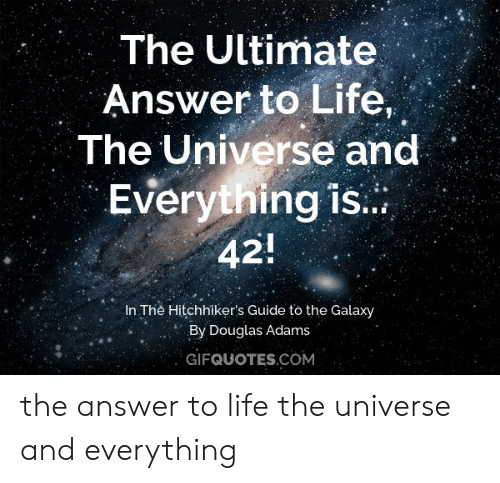

In [74]:
#Load image from local storage
Image(filename = "42 Answer.PNG", width = 900, height = 900)

**NB: StandardScaler was also imported and fit but seemed to lower model accuracy overall so it was ultimately left out**

In [75]:
y = fin_train.avg_price_per_kg #defining label
x = fin_train.drop('avg_price_per_kg',axis=1) #defining features

x_train, x_test, y_train, y_test = tts(x, y, test_size=0.05, random_state=42) # creating train-test-split

#converting series to arrays
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

A number of models are then tested, with multiple parameters, and are assessed based on key performance metrics.

**Note: A GridSearch CV was at one point used but due to computational power was scrapped**

**Linear Regression model:**

In [76]:
#Linear Regression model is instantiated with the default parameters
model_lr = LinearRegression() 

#Linear Regression model is fit to training dataset
model_lr.fit(x_train, y_train) 

#performance metrics are calcualted. These metrics seemed to be the most reliable for comparision and uploading to Kaggle
print("Train MSE " ,metrics.mean_squared_error(y_train, model_lr.predict(x_train)))
print("Test MSE " ,metrics.mean_squared_error(y_test, model_lr.predict(x_test)))
print("RMSE ", math.sqrt(metrics.mean_squared_error(y_test, model_lr.predict(x_test))))

Train MSE  1.891157457697162
Test MSE  1.776342385583127
RMSE  1.332794952565145


Based on these metrics, we conclude that the Linear Regression Model does not appear to be performing well.

**Lasso Regression Model:**

In [77]:
#parameters for the model are defined
model_las = Lasso(alpha=0.1, random_state=42)

#Lasso model is fit to the training dataset
model_las.fit(x_train, y_train)

#performance metrics are calcualted
print("Train MSE " ,metrics.mean_squared_error(y_train, model_las.predict(x_train)))
print("Test MSE " ,metrics.mean_squared_error(y_test, model_las.predict(x_test)))
print("RMSE ", math.sqrt(metrics.mean_squared_error(y_test, model_las.predict(x_test))))

Train MSE  2.616863906377461
Test MSE  2.7734931544345223
RMSE  1.6653807836151233


Based on these metrics, the Lasso Regression Model appears to be performing even worse than the Linear Regression Model. The lowest scores for the Lasso Regression Model were calcualted at 0.1 alpha. An alpha of 0 is essentially a Linear Regression Model. This is also not suprising as the Lasso Model prefers less features where the models, in this case, are using all avaliable features.

**Ridge Regression Model:**

In [78]:
#parameters for the Ridge Regression model are defined
model_ridge = Ridge(alpha=0.1, random_state=42)

#the model is fit to the training dataset
model_ridge.fit(x_train, y_train)

#performance metrics are calculated
print("Train MSE " ,metrics.mean_squared_error(y_train, model_ridge.predict(x_train)))
print("Test MSE " ,metrics.mean_squared_error(y_test, model_ridge.predict(x_test)))
print("RMSE ", math.sqrt(metrics.mean_squared_error(y_test, model_ridge.predict(x_test))))

Train MSE  1.891220090847978
Test MSE  1.7770616227451284
RMSE  1.3330647481443383


As with the Lasso Regression Model, the Ridge Regression Model seems to perform best with a low Alpha, indicating a stronger Linear Regression Model potentially. The Ridge Regression model does appear to be performing better than Lasso Regression model, if only slightly.

**The RandomForestRegressor Model:** 

The paramaters which performed the best on average (through trial-and-error) seemed to be the settings of:

- max_features = 'auto'
- vebose = 1

In [79]:
#RandomForestRegressor parameters are defined
model_rf = RandomForestRegressor(max_features="auto", verbose=1)

#Random forest model is fit to the training set
model_rf.fit(x_train,y_train)

#performance metrics are calculated
print("Best Case Train MSE - Random Forest: " ,metrics.mean_squared_error(y_train, model_rf.predict(x_train)))
print("Best Case Test MSE - Random Forest: " ,metrics.mean_squared_error(y_test, model_rf.predict(x_test)))
print("Best Case RMSE - Random Forest: ", math.sqrt(metrics.mean_squared_error(y_test, model_rf.predict(x_test))))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


Best Case Train MSE - Random Forest:  0.05837812594390486
Best Case Test MSE - Random Forest:  0.1970519091836734
Best Case RMSE - Random Forest:  0.4439052930340811


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Here one may observe that the Random Forest Model appears to be performing the best so far.

**DecisionTreeRegressor Model:** 

The paramaters which performed the best on average (through trial-and-error) seemed to be the settings of:

- max_features = 'log2'
- random_state = 42 (This is just to keep in line with a consistent random_state across all training sets)

*A number of other parameter settings were tried but the ones mentioned above seemed to provide the best scores overall.*

In [80]:
#DecisionTreeRegressor parameters are defined
model_dt = DecisionTreeRegressor(random_state=42, max_features='log2')

#DecisionTreeRegressor model is fit to the training dataset
model_dt.fit(x_train,y_train)

#performance metrics are calculated and displayed
print("Best Case Train MSE - Decision Tree: " ,metrics.mean_squared_error(y_train, model_dt.predict(x_train)))
print("Best Case Test MSE - Decision Tree: " ,metrics.mean_squared_error(y_test, model_dt.predict(x_test)))
print("Best Case RMSE - Decision Tree: ", math.sqrt(metrics.mean_squared_error(y_test, model_dt.predict(x_test))))

Best Case Train MSE - Decision Tree:  3.489028814893364e-32
Best Case Test MSE - Decision Tree:  1.1273438775510203
Best Case RMSE - Decision Tree:  1.0617645113446863


It may be observed the Decision Tree Model definately appears to perform worse than the Random Forest model but better than the Ridge and Lasso Regression models.

**BaggingRegressor Model:**

The following parameters to try and obtain the lowest scores:
    
- n_estimators = 1000 (perhaps a bit much in terms of computational time but did seem to give better model performance
- bootstrap = True (resampling with replacement)
- random_state = 42 (for consistency)
- warm_start = False (for creating a more generalized model

*A number of other parameter settings were tried but the ones mentioned above seemed to provide the best scores overall.*

In [81]:
#BaggingRegressor model parameters are defined
bag_reg = BaggingRegressor(n_estimators = 1000, warm_start = False, n_jobs = -1, bootstrap = True, random_state =42)

#BaggingRegressor model is fit to training data
bag_reg.fit(x_train,y_train)

#performance metrics are calculated and dsiplayed below
print("Best Case Train MSE - Bagging: " ,metrics.mean_squared_error(y_train, bag_reg.predict(x_train)))
print("Best Case Test MSE - Bagging: " ,metrics.mean_squared_error(y_test, bag_reg.predict(x_test)))
print("Best Case RMSE - Bagging: ", math.sqrt(metrics.mean_squared_error(y_test, bag_reg.predict(x_test))))

Best Case Train MSE - Bagging:  0.052354120639644446
Best Case Test MSE - Bagging:  0.21131087683367342
Best Case RMSE - Bagging:  0.4596856282653107


This Bagging Regresssor model also appear to be performing better than most. The only other comparable model is the Random Forest at this point.

**AdaBoostRegressor Model:**

The following parameters are used to obtain the lowest scores:

- random_state = 42 (for consistency)
- base_estimator = model_dt (Decision Tree was chosen, Random Forest may have proven better but took to much computational time to run efficiently) 
- n_estimators = 100 

*A number of other parameter settings were tried but the ones mentioned above seemed to provide the best scores overall.*

In [82]:
#parameters of the AdaBoostRegresor are defined
bst_reg = AdaBoostRegressor(random_state=42, base_estimator = model_dt, n_estimators=100)

#AdaBoostingRegressor model is fit to the training set
bst_reg.fit(x_train,y_train)

#performance metrics are calculated and displayed below
print("Best Case Train MSE - Boost: " ,metrics.mean_squared_error(y_train, bst_reg.predict(x_train)))
print("Best Case Test MSE - Boost: " ,metrics.mean_squared_error(y_test, bst_reg.predict(x_test)))
print("Best Case RMSE - Boost: ", math.sqrt(metrics.mean_squared_error(y_test, bst_reg.predict(x_test))))

Best Case Train MSE - Boost:  0.0004216828478964407
Best Case Test MSE - Boost:  0.28421326530612245
Best Case RMSE - Boost:  0.5331165588369231


One may ascertain that the AdaBoostRegressor model is also performing relatively well - other than on the actual training set.

**VotingRegressor Model:** 

The models which have obtained the best accuaracy thus far are defined in a variable called 'models' and are used to fit the VotingRegressor (and later a StackingRegressor as well). The models chosen were as follows:

- AdaBoost (bst_reg)
- Bagging (bag_reg)
- Random Forest (model_rf)

In [83]:
#defining the models which will be included in the ensemble models 
models = [("Boost",bst_reg),("Bagging",bag_reg),("Random Forest",model_rf)]

#specifying weights for weighted averaging of the models - in respective order
model_weightings = np.array([0.3,0.4,0.3])

#defining the model parameters of the VotingRegressor
v_reg = VotingRegressor(estimators=models,weights=model_weightings)

#fitting the VotingRegressor to the training dataset
v_reg.fit(x_train,y_train)

#metrics of note are printed out below for evaluation
print("Best Case Train MSE - Voting: " ,metrics.mean_squared_error(y_train, v_reg.predict(x_train)))
print("Best Case Test MSE - Voting: " ,metrics.mean_squared_error(y_test, v_reg.predict(x_test)))
print("Best Case RMSE - Voting: ", math.sqrt(metrics.mean_squared_error(y_test, v_reg.predict(x_test))))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Best Case Train MSE - Voting:  0.025695645885967705


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Best Case Test MSE - Voting:  0.20297987902624473
Best Case RMSE - Voting:  0.45053288340169434


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


**StackingRegressor and accompanying metrics:**

In [84]:
#the meta_learner is defined as a linear model
meta_learner_reg = LinearRegression()

#defining parameters of StackingRegressor model
s_reg = StackingRegressor(estimators=models, final_estimator=meta_learner_reg, passthrough = True,cv=10, n_jobs=-1)

#fitting Stacking Regressor model to the training dataset
s_reg.fit(x_train,y_train)

#metrics of note are printed out below for evaluation
print("Best Case Train MSE - Stacking: " ,metrics.mean_squared_error(y_train, s_reg.predict(x_train)))
print("Best Case Test MSE - Stacking: " ,metrics.mean_squared_error(y_test, s_reg.predict(x_test)))
print("Best Case RMSE - Stacking: ", math.sqrt(metrics.mean_squared_error(y_test, s_reg.predict(x_test))))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Best Case Train MSE - Stacking:  0.03932762043674418


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Best Case Test MSE - Stacking:  0.18888290608872116
Best Case RMSE - Stacking:  0.4346066107282782


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


After observing the performance of all the models that were tested, it appears that the Stacking Model performs the best over all. 

Stacking regressions is a method for forming linear combinations of different predictors to give improved prediction accuracy. 

The idea is to use cross-validation data and least squares under non-negativity constraints to determine the coefficients in the combination. 

Since it is the best performing model, it is used to predict the test set of the data:

In [85]:
#predicting test data set of StackingRegressor Model
y_pred = s_reg.predict(fin_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


The variable 'index' is set to the index of df_test (the original test dataset) to ensure correct submission of rows in the test dataset.

In [86]:
index = df_test['Index']

The 'submission' variable is used to create a dataframe to be exported:

In [87]:
submission = pd.DataFrame({'Index' : index, 'avg_price_per_kg' : y_pred})

The dataframe is then exported to a csv file for uploading to Kaggle:

In [88]:
submission.to_csv(r'C:\Users\tamak\Desktop\Data Science\Predicts\Predict 4\EDSA_ZM-Team1\KaggleCSV.csv', index = False)